In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl


ERROR! Session/line number was not unique in database. History logging moved to new session 222


In [3]:
pip install pydot

ERROR! Session/line number was not unique in database. History logging moved to new session 221
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras-vis

     --------------------------------------- 12.1/12.1 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 11.9 MB/s eta 0:00:00
     -------------------------------------- 313.2/313.2 kB 9.8 MB/s eta 0:00:00
     ------------------------------------- 178.9/178.9 kB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Input, BatchNormalization, multiply, concatenate, Flatten, Activation, dot  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
import pydot as pyd
from tensorflow.keras.utils import plot_model, model_to_dot




ERROR! Session/line number was not unique in database. History logging moved to new session 225


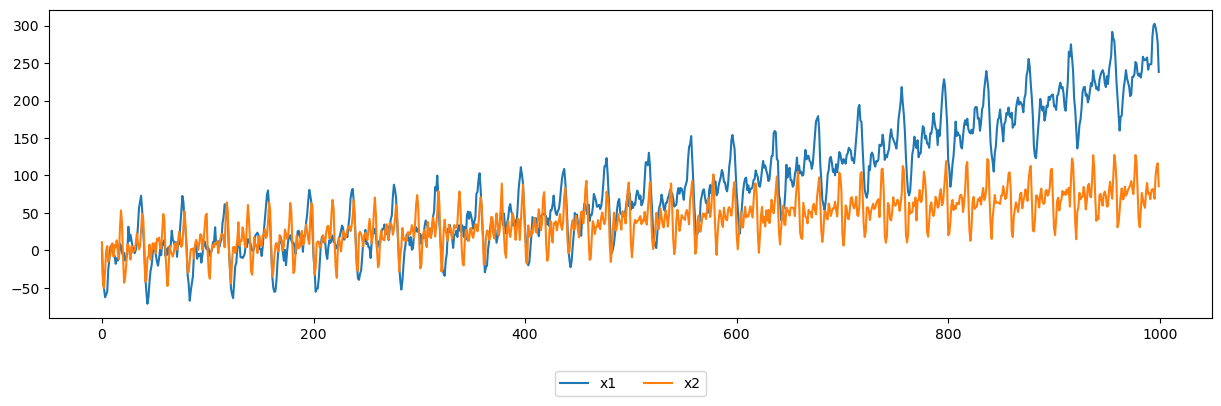

'\nbbox_to_anchor: 범례 상자 위치 조정\nfancybox: True로 설정하면 상자가 둥근 모서리로 표시\nshadow: 범례 상자에 그림자 효과\nncol: 범례의 열 수를 지정 여기서는 2열로 범례 표시\n'

In [7]:
# 데이터 생성
n_=1000
t=np.linspace(0,50*np.pi,n_) 
#임의 시간 추출 0-50pi 까지의 범위를 균일하게 나눈 숫자배열
# n_ 만큼 숫자를 생성

# pattern + trend + noise
x1 = sum([20*np.sin(i*t+np.pi) for i in range(5)]) + 0.01*(t**2) + np.random.normal(0,6,n_)
# 1. 주기가 다른 5개의 사인함수 합: 20sin(it+pi)  (이때 i는 0-4까지의 값, t는 주어짐)
# 2. 추가적으로 0.01t^2 더함
# 3. 평균 0, 표준편차 6의 정규 분포 따르는 랜덤 노이즈

x2= sum([15*np.sin(2*i*t+np.pi) for i in range(5)]) + 0.5*t + np.random.normal(0,6,n_)

plt.figure(figsize=(15,4))
plt.plot(range(len(x1)),x1,label='x1') # x축 값으로 사용할 범위를 지정해야 한다.
plt.plot(range(len(x2)),x2,label='x2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=False,ncol=2)
plt.show()

"""
bbox_to_anchor: 범례 상자 위치 조정
fancybox: True로 설정하면 상자가 둥근 모서리로 표시
shadow: 범례 상자에 그림자 효과
ncol: 범례의 열 수를 지정 여기서는 2열로 범례 표시
"""

In [8]:
# 전처리

train_ratio=0.8
train_len=int(train_ratio*t.shape[0])
print(train_len)

800


In [10]:
# 시계열 데이터를 안정적으로 만들어 모델 학습 시키려면 트랜드제거가 필요하다.
# 여기서는 트랜드의 차수가 알려져 있다 가정하고, 분리된 트랜드 선을 x1,x2에 적합시킨다

x_index=np.array(range(len(t)))

# np.polyfit : 주어진 데이터에 대해 최소 제곱을 갖는 다항식 피팅
x1_trend_p= np.polyfit(x_index[:train_len], x1[:train_len],2)
x2_trend_p= np.polyfit(x_index[:train_len],x2[:train_len],1)
print(x1_trend_p)
print(x2_trend_p)

[ 2.42297665e-04  8.62314096e-03 -1.74400892e+00]
[ 0.08052465 -0.39898401]


In [11]:
x1_trend= (x_index**2)*x1_trend_p[0]+x_index*x1_trend_p[1]+ x1_trend_p[2]
x2_trend= (x_index)*x2_trend_p[0]+x2_trend_p[1]

ERROR! Session/line number was not unique in database. History logging moved to new session 226


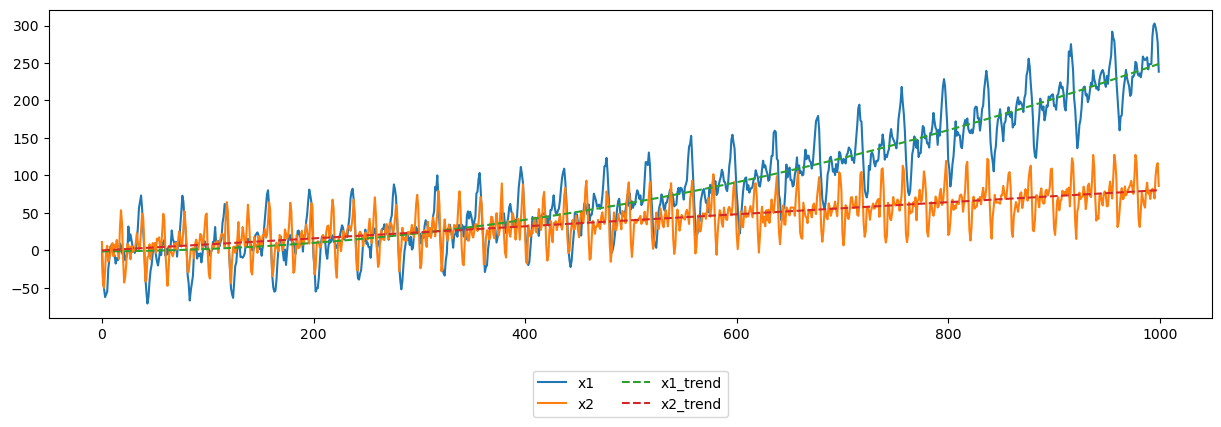

In [12]:
# 트렌드 잘 맞는지 확인
 
plt.figure(figsize=(15,4))
plt.plot(range(len(x1)),x1,label='x1')
plt.plot(range(len(x2)),x2,label='x2')
plt.plot(range(len(x1_trend)),x1_trend,linestyle='--', label='x1_trend')
plt.plot(range(len(x2_trend)),x2_trend,linestyle='--',label='x2_trend')

plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=False,ncol=2)
plt.show()

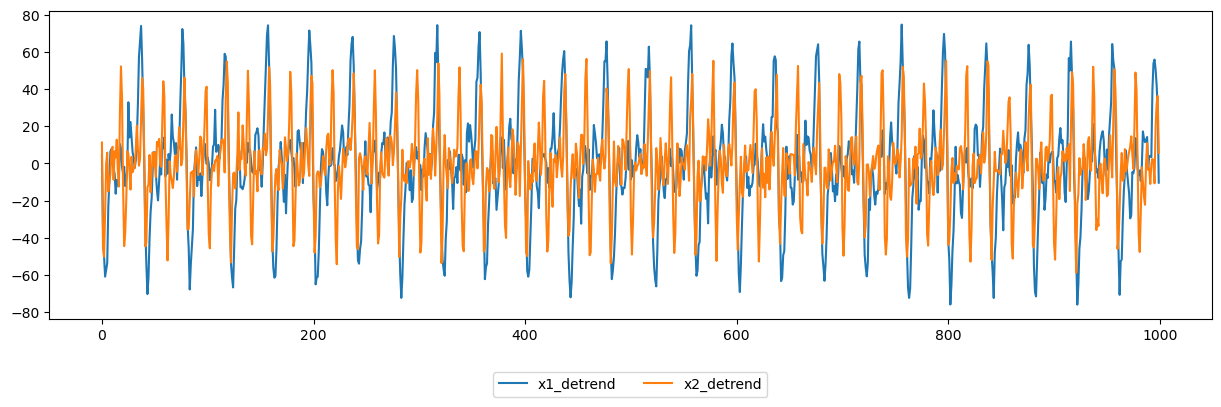

In [13]:
# trend 제거

x1_detrend=x1-x1_trend
x2_detrend=x2-x2_trend

plt.figure(figsize=(15,4))
plt.plot(range(len(x1_detrend)),x1_detrend,label='x1_detrend')
plt.plot(range(len(x2_detrend)),x2_detrend,label='x2_detrend')
plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=False,ncol=2)
plt.show()